In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import zipfile
import requests
import os
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras import layers
import spacy

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data

,text_type,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...
...,...,...
20343,ham,/ban
20344,ham,/ban
20345,ham,/ban
20346,ham,Kaisi hii


In [4]:
# change the column names 
columns = ["spam" , "text"]
data.columns = columns

In [5]:
# change the spam values to 1 and ham values to 0 
data.loc[data['spam'] == 'spam', 'spam'] = 1
data.loc[data['spam'] == 'ham', 'spam'] = 0


### Pre processing of text data 

Removing special characters and punctuation, white spaces

In [6]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


# Apply the clean_text function to every sentence in the specified column
data["text"] = data["text"].apply(lambda x: clean_text(x))



In [7]:
# Define the function for stopword removal
def remove_stopwords(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Remove stopwords
    filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
    # Join the filtered words back into a sentence
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Set the NLTK data path to the directory where NLTK data is stored locally
nltk_data_path = "/Users/ojas/PythonLib/nltk_data"  # Replace "/path/to/nltk_data" with the actual path

# Check if the NLTK data path exists
if os.path.exists(nltk_data_path):
    # Add the NLTK data path to the list of paths
    nltk.data.path.append(nltk_data_path)
    print("NLTK data path set to:", nltk_data_path)
else:
    print("NLTK data path not found. Please provide the correct path.")

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column containing text data
# Replace 'df' and 'column_name' with the actual names in your DataFrame

# Apply the remove_stopwords function to every sentence in the specified column
data["text"] = data["text"].apply(lambda x: remove_stopwords(x))


NLTK data path set to: /Users/ojas/PythonLib/nltk_data


In [8]:
data

,spam,text
0,1,naturally irresistible corporate identity lt r...
1,1,stock trading gunslinger fanny merrill muzo co...
2,1,unbelievable new homes made easy im wanting sh...
3,1,4 color printing special request additional in...
4,1,money get software cds software compatibility ...
...,...,...
20343,0,ban
20344,0,ban
20345,0,ban
20346,0,kaisi hii


Lemmatization and Stemming 

In [9]:
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the function for lemmatization
def lemmatize_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Apply lemmatization to each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Join the lemmatized words back into a sentence
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

data["text"] = data["text"].apply(lambda x: lemmatize_text(x))

In [10]:
# Initialize the Porter stemmer
porter = PorterStemmer()

# Define the function for stemming
def stem_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Apply stemming to each word
    stemmed_words = [porter.stem(word) for word in words]
    # Join the stemmed words back into a sentence
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column containing text data
# Replace 'df' and 'column_name' with the actual names in your DataFrame

# Apply the stem_text function to every sentence in the specified column
data["text"] = data["text"].apply(lambda x: stem_text(x))

Tokenize

In [11]:
data["text"] = data["text"].apply(lambda x: word_tokenize(x))

In [12]:
data

,spam,text
0,1,"[natur, irresist, corpor, ident, lt, realli, h..."
1,1,"[stock, trade, gunsling, fanni, merril, muzo, ..."
2,1,"[unbeliev, new, home, made, easi, im, want, sh..."
3,1,"[4, color, print, special, request, addit, inf..."
4,1,"[money, get, softwar, cd, softwar, compat, gre..."
...,...,...
20343,0,[ban]
20344,0,[ban]
20345,0,[ban]
20346,0,"[kaisi, hii]"


Convert all the data to numeric form and add some padding to make every inputs length equal

In [13]:
# Load the spaCy model with pre-trained word embeddings
nlp = spacy.load("en_core_web_md")

In [14]:
# Function to convert text data into numeric form using spaCy word embeddings
def text_to_vectors(tokens):
    doc = nlp(" ".join(tokens))
    return doc.vector

In [15]:
# Convert text data into numeric form using spaCy word embeddings
data["text"] = data["text"].apply(text_to_vectors)

In [16]:
data

,spam,text
0,1,"[-0.52931845, 0.24087495, -1.395558, 0.1779850..."
1,1,"[0.061905067, 0.3644289, -0.56080157, 0.573979..."
2,1,"[0.14448336, -0.45342216, -1.103903, -0.296925..."
3,1,"[0.893934, -0.86258966, 1.6417671, -0.07473087..."
4,1,"[-1.8044542, 0.677355, -2.069732, -0.49281555,..."
...,...,...
20343,0,"[0.61303, 7.0863, 3.8421, 4.9541, 2.3422, 2.34..."
20344,0,"[0.61303, 7.0863, 3.8421, 4.9541, 2.3422, 2.34..."
20345,0,"[0.61303, 7.0863, 3.8421, 4.9541, 2.3422, 2.34..."
20346,0,"[-1.0865, 2.8055, -1.09675, -1.70265, -2.9496,..."


In [17]:
X = data["text"]
y = data["spam"] 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

12059    [0.49853426, 0.7796143, -1.1526443, -1.4513485...
11292    [-2.534225, 4.81135, 1.31345, 0.15004998, 0.93...
6619     [-0.054993562, 0.9616838, -0.61024797, 0.24056...
12947    [-0.5919954, 0.14481425, -2.6046429, -2.6459, ...
17200    [1.837759, 1.67471, -0.8610748, -0.53129, 1.02...
                               ...                        
11284    [-1.6434386, 1.2791288, 0.26474714, -0.5530429...
11964    [2.274916, 1.8385999, -4.09012, -0.748812, 0.0...
5390     [-0.2858694, 0.3991786, -0.7073146, 0.33981454...
860      [1.2424657, -0.73428714, 1.5394286, -0.5861571...
15795    [0.57522994, -3.56051, -0.5687866, 3.69888, 3....
Name: text, Length: 16278, dtype: object

In [18]:
# Define the maximum sequence length and padding value
max_seq_length = 100  # Example: set the maximum sequence length to 100
padding_value = 0  # Example: set the padding value to 0
# Pad sequences to ensure uniform length
X_train_padded = pad_sequences(X_train, maxlen=max_seq_length, padding='post', value=padding_value)
X_test_padded = pad_sequences(X_test, maxlen=max_seq_length, padding='post', value=padding_value)


TensorFlow model 
Input Layer: Defines the input shape of the model.
LSTM Layers: Capture sequential patterns in the input data.
Dropout Layers: Regularize the model to prevent overfitting.
Dense Layers: Introduce non-linearity and produce the final output.

In [19]:
# Assuming 'X_train_padded' and 'X_test_padded' are your padded sequences of shape (batch_size, max_seq_length)

# Define the model with the correct input shape
model = tf.keras.Sequential([
    layers.Input(shape=(max_seq_length,)),  # Input shape is the length of the sequences
    layers.Reshape((max_seq_length, 1)),  # Reshape input to add a third dimension
    layers.LSTM(64, return_sequences=True),  # LSTM layer with 64 units and return sequences set to True
    layers.Dropout(0.5),
    layers.LSTM(64),  # Another LSTM layer with 64 units
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


In [20]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,145 (211.50 KB)

 Trainable params: 54,145 (211.50 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Convert data types to compatible types
X_train_padded = X_train_padded.astype(np.float32)  # Convert X_train_padded to float32
y_train = y_train.astype(np.int32)  # Convert y_train to int32
X_test_padded = X_test_padded.astype(np.float32)  # Convert X_test_padded to float32
y_test = y_test.astype(np.int32)  # Convert y_test to int32

In [23]:

# Train the model using the padded sequences
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model using the padded test sequences
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.6987 - loss: 0.6088 - val_accuracy: 0.7064 - val_loss: 0.5733
Epoch 2/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.7049 - loss: 0.5806 - val_accuracy: 0.7217 - val_loss: 0.5663
Epoch 3/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.7204 - loss: 0.5618 - val_accuracy: 0.7429 - val_loss: 0.5379
Epoch 4/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.7400 - loss: 0.5357 - val_accuracy: 0.7260 - val_loss: 0.5289
Epoch 5/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.7606 - loss: 0.4965 - val_accuracy: 0.7792 - val_loss: 0.4796
Epoch 6/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.7645 - loss: 0.4922 - val_accuracy: 0.7660 - val_loss: 0.4887
Epoch 7/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.7701 - loss: 0.4833 - val_accuracy: 0.7773 - val_loss: 0.4724
Epoch 8/10
407/407 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.7780 - loss: 0.4679 - 

In [24]:
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


### The model achieved a moderate level of performance with a test accuracy of approximately 79.16%. This indicates that the model correctly classified about 79.16% of the test instances as either spam or non-spam. The test loss of approximately 0.4547 indicates the average prediction error of the model on the test dataset, with lower values indicating better performance in terms of minimizing errors. The corresponding test loss suggests that there is room for improvement in minimizing prediction errors.

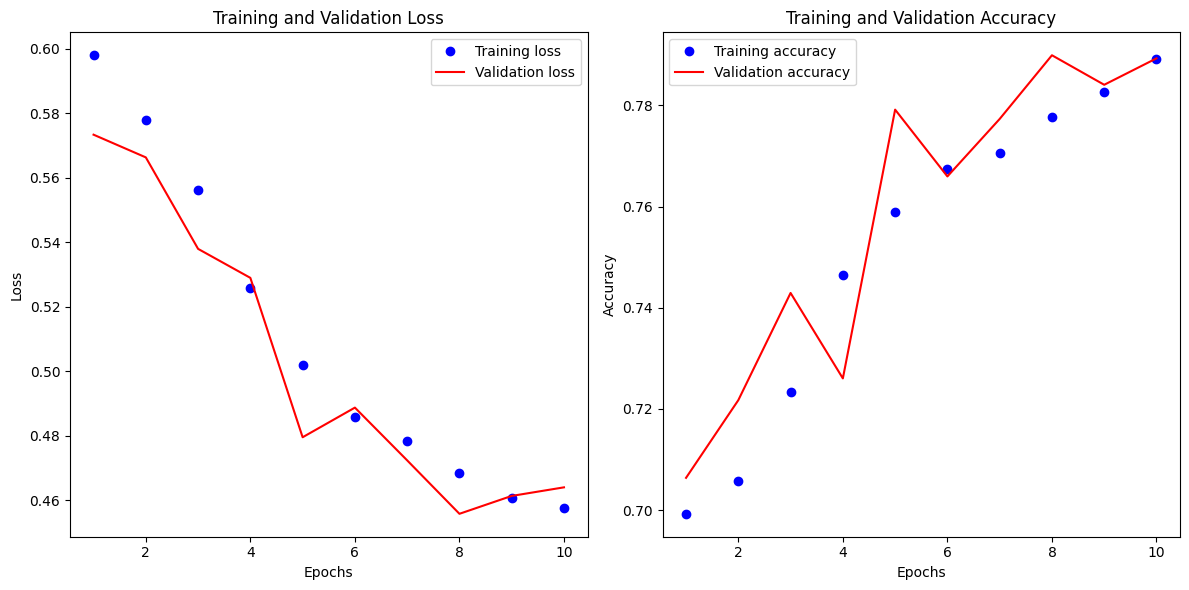

In [25]:
# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss
ax1.plot(epochs, train_loss, 'bo', label='Training loss')
ax1.plot(epochs, val_loss, 'r', label='Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot training and validation accuracy
ax2.plot(epochs, train_acc, 'bo', label='Training accuracy')
ax2.plot(epochs, val_acc, 'r', label='Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Throughout the training phase, the model exhibited a clear pattern: as the epochs progressed, the training loss consistently diminished, and the accuracy steadily increased. These trends underscore the model's iterative learning journey, showcasing its advancing expertise in discerning spam messages. However, the validation metrics depicted a more fluctuating pattern, suggesting occasional difficulties in generalization. While the validation results remained consistent overall, there were sporadic fluctuations, indicating occasional challenges in adapting to diverse scenarios. This underscores the ongoing need to enhance the model's capacity for generalization, ensuring reliable spam detection across varied contexts.